In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Method for displaying outlier graphs
def outlier(col):
    plt.figure()
    ax = plt.gca()
    ax.boxplot(col)
    ax.set_ylabel('Value')

# Method for receiving data to detect outliers and return outliers values
def detect_outliers(data):
    # Calculation of 1st, 3rd, IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Setting an Outlier Boundary
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Setting an Outlier Boundary
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

In [38]:
df_visitor = pd.read_csv("assets/output/visitors.csv")

In [39]:
# Pre-processing operation to replace the visitor column with numbers
df_visitor['visitor'] = df_visitor['visitor'].str.replace(',', '')
df_visitor['visitor'] = df_visitor['visitor'].astype(int)

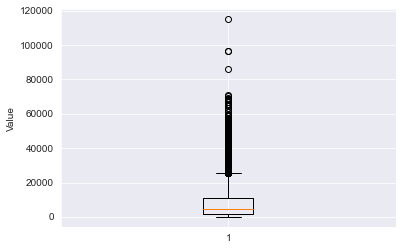

In [41]:
# Boxplot of the current 'visitor' column
outlier(df_visitor['visitor'])

In [42]:
# Numerical status of the visitor column
df_visitor.describe()

,visitor
count,3951.000000
mean,9122.186029
std,11653.034037
min,2.000000
25%,1840.000000
50%,4619.000000
75%,11280.500000
max,115002.000000


In [43]:
# Number of Q1 and Q3
q1 = np.percentile(df_visitor['visitor'], 25)
q3 = np.percentile(df_visitor['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1840.0 q3: 11280.5


In [44]:
# Extracting only non-outlier figures
outliers = detect_outliers(df_visitor['visitor'])
non_outliers = df_visitor[~outliers]

In [45]:
non_outliers['visitor']

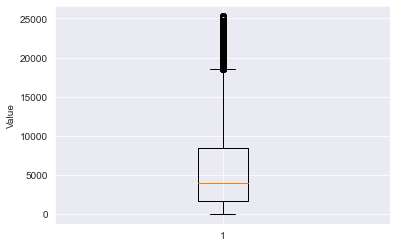

In [47]:
# Visualize non-outlier numerical box plots
outlier(non_outliers['visitor'])

In [48]:
# Numerical status of non-outlier
non_outliers.describe()

,visitor
count,3586.000000
mean,6098.088399
std,5901.432713
min,2.000000
25%,1692.250000
50%,3909.000000
75%,8441.000000
max,25286.000000


In [49]:
# Number of Q1 and Q3
q1 = np.percentile(non_outliers['visitor'], 25)
q3 = np.percentile(non_outliers['visitor'], 75)
print("q1: {} q3: {}".format(q1, q3))

q1: 1692.25 q3: 8441.0


In [3]:
df = pd.read_csv('assets/output/encodingResult.csv')

In [5]:
df_temp = df.drop('date', axis=1)

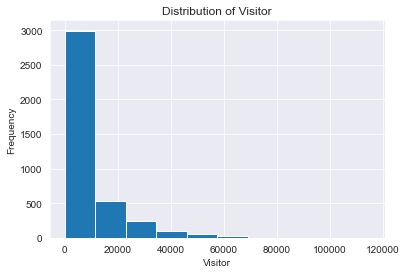

In [57]:
# Histogram visualization
plt.hist(df['visitor'], bins=10)
plt.xlabel('Visitor')
plt.ylabel('Frequency')
plt.title('Distribution of Visitor')
plt.show()

In [60]:
df_temp['visitor'].describe()

count      3951.000000
mean       9122.186029
std       11653.034037
min           2.000000
25%        1840.000000
50%        4619.000000
75%       11280.500000
max      115002.000000
Name: visitor, dtype: float64

In [7]:
# Pearson correlation
df_temp.corr()['visitor']

('sulfur_dioxide_min',)           -0.070554
('sulfur_dioxide_mean',)          -0.055741
('sulfur_dioxide_median',)        -0.056247
('carbon_monoxide_min',)          -0.119912
('carbon_monoxide_max',)          -0.141581
('carbon_monoxide_mean',)         -0.142012
('carbon_monoxide_median',)       -0.127357
('ozone_max',)                     0.227335
('ozone_mean',)                    0.184809
('ozone_median',)                  0.127220
('nitrogen_dioxide_min',)         -0.088284
('nitrogen_dioxide_mean',)        -0.049791
('nitrogen_dioxide_median',)      -0.060904
('humidity_min',)                  0.097127
('humidity_max',)                  0.076113
('humidity_mean',)                 0.099021
('humidity_median',)               0.095778
('highest temperature_min',)       0.155415
('highest temperature_max',)       0.151058
('highest temperature_mean',)      0.152078
('highest temperature_median',)    0.152502
('lowest temperature_min',)        0.147162
('lowest temperature_max',)     

In [8]:
# df.corr 기본 값은 pearson입니다
df_corr = df_temp.corr()

In [9]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pearson = np.abs(df_corr['visitor'])
print(pearson)

('sulfur_dioxide_min',)            0.070554
('sulfur_dioxide_mean',)           0.055741
('sulfur_dioxide_median',)         0.056247
('carbon_monoxide_min',)           0.119912
('carbon_monoxide_max',)           0.141581
('carbon_monoxide_mean',)          0.142012
('carbon_monoxide_median',)        0.127357
('ozone_max',)                     0.227335
('ozone_mean',)                    0.184809
('ozone_median',)                  0.127220
('nitrogen_dioxide_min',)          0.088284
('nitrogen_dioxide_mean',)         0.049791
('nitrogen_dioxide_median',)       0.060904
('humidity_min',)                  0.097127
('humidity_max',)                  0.076113
('humidity_mean',)                 0.099021
('humidity_median',)               0.095778
('highest temperature_min',)       0.155415
('highest temperature_max',)       0.151058
('highest temperature_mean',)      0.152078
('highest temperature_median',)    0.152502
('lowest temperature_min',)        0.147162
('lowest temperature_max',)     

## 상관도 높은 순서: 주말, 오존, 온도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> min, fine_dust -> median, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> min, wind direction -> min, skystate -> max

In [9]:
# Kendall correlation
df_temp.corr(method='kendall')['visitor']

sulfur_dioxide_min      -0.116007
sulfur_dioxide_max      -0.015797
sulfur_dioxide_mean     -0.040749
sulfur_dioxide_median   -0.048785
carbon_monoxide_min     -0.052174
                           ...   
weekday_3.0             -0.112544
weekday_4.0             -0.101523
weekday_5.0             -0.047098
weekday_6.0              0.259337
weekday_7.0              0.220517
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 주말, 오존, 온도, 습도
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> median,
## wind direction -> min, skystate -> max

In [10]:
# Spearman correlation
df_temp.corr(method='spearman')['visitor']

sulfur_dioxide_min      -0.152076
sulfur_dioxide_max      -0.022849
sulfur_dioxide_mean     -0.063964
sulfur_dioxide_median   -0.069535
carbon_monoxide_min     -0.071462
                           ...   
weekday_3.0             -0.137790
weekday_4.0             -0.124296
weekday_5.0             -0.057663
weekday_6.0              0.317509
weekday_7.0              0.269981
Name: visitor, Length: 100, dtype: float64

## 상관도 높은 순서: 오존, 온도, 습도 & 일산화탄소
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> mean med유사,
## wind direction -> min, skystate -> max

# 종합
## sulfur_dioxide -> min, carbon_monoxide -> max, ozone -> max, nitrogen_dioxide -> max, fine_dust -> max, rainfall -> mean,
## probability of precipitation -> min, humidity -> min, highest temp -> max, lowest temp -> min, wind speed -> med,
## wind direction -> min, skystate -> max

In [67]:
# And the correlation coefficient was analyzed again only with the col with the best corr value
selected_feat = ['sulfur_dioxide_min', 'carbon_monoxide_max', 'ozone_max', 'nitrogen_dioxide_max', 'fine_dust_pm10_max',                 'rainfall_mean', 'probability of precipitation_min', 'humidity_min', 'highest temperature_max',                 'lowest temperature_min', 'wind speed_median', 'visitor']

In [68]:
# Correlation of selected attributes
df_selected = df[selected_feat]

In [69]:
df_selected.corr().iloc[:,-1]

sulfur_dioxide_min                 -0.021263
carbon_monoxide_max                -0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                      -0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                  -0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [70]:
df_selected.corr(method='kendall').iloc[:,-1]

sulfur_dioxide_min                 -0.090991
carbon_monoxide_max                -0.098737
ozone_max                           0.259777
nitrogen_dioxide_max                0.059088
fine_dust_pm10_max                  0.028219
rainfall_mean                       0.020338
probability of precipitation_min    0.055104
humidity_min                        0.091097
highest temperature_max             0.178483
lowest temperature_min              0.176299
wind speed_median                  -0.072114
visitor                             1.000000
Name: visitor, dtype: float64

In [71]:
df_selected.corr(method='spearman').iloc[:,-1]

sulfur_dioxide_min                 -0.125357
carbon_monoxide_max                -0.148388
ozone_max                           0.390589
nitrogen_dioxide_max                0.087642
fine_dust_pm10_max                  0.042020
rainfall_mean                       0.027557
probability of precipitation_min    0.073442
humidity_min                        0.131807
highest temperature_max             0.262179
lowest temperature_min              0.257423
wind speed_median                  -0.103605
visitor                             1.000000
Name: visitor, dtype: float64

In [72]:
# Correlation absolute value of selected attributes
abs(df_selected.corr().iloc[:,-1])

sulfur_dioxide_min                  0.021263
carbon_monoxide_max                 0.110792
ozone_max                           0.265874
nitrogen_dioxide_max                0.090950
fine_dust_pm10_max                  0.023442
rainfall_mean                       0.050165
probability of precipitation_min    0.035505
humidity_min                        0.074496
highest temperature_max             0.175116
lowest temperature_min              0.173374
wind speed_median                   0.055486
visitor                             1.000000
Name: visitor, dtype: float64

In [73]:
abs(df_temp.corr(method='kendall')['visitor'])

sulfur_dioxide_min       0.090991
sulfur_dioxide_max       0.026713
sulfur_dioxide_mean      0.050574
sulfur_dioxide_median    0.057604
sulfur_dioxide_std       0.055543
                           ...   
weekday_3.0              0.098525
weekday_4.0              0.081009
weekday_5.0              0.038320
weekday_6.0              0.213039
weekday_7.0              0.219046
Name: visitor, Length: 116, dtype: float64

In [74]:
abs(df_temp.corr(method='spearman')['visitor'])

sulfur_dioxide_min       0.125357
sulfur_dioxide_max       0.040178
sulfur_dioxide_mean      0.079862
sulfur_dioxide_median    0.085453
sulfur_dioxide_std       0.083915
                           ...   
weekday_3.0              0.120649
weekday_4.0              0.099199
weekday_5.0              0.046925
weekday_6.0              0.260876
weekday_7.0              0.268231
Name: visitor, Length: 116, dtype: float64